In [1]:
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import functions.eddy_feedback as ef

# Reanalysis calculations (vertically-averaged)

## Reanalysis EFPs

In [2]:
path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
data_file = os.path.join(path, 'JRA55_srip_ubar_div1.nc')
jra_srip = xr.open_mfdataset(data_file, chunks={'time': 30})
jra_srip = jra_srip.sel(time=slice('1979-01', '2010-12'))

nh_efp = ef.calculate_efp(jra_srip, data_type='reanalysis', which_div1='div1_pr')
sh_efp = ef.calculate_efp(jra_srip, data_type='reanalysis', calc_south_hemis=True, which_div1='div1_pr')

print(nh_efp, sh_efp)

0.4556 0.3671


## Reanalysis variances

### NAM (AO) and SAM (AAO)

In [3]:
eofs_ds_nam = xr.open_dataset('/home/links/ct715/eddy_feedback/chapter1/annular_modes/vertically_averaged/data/jra55/jra55_daily_va_eofs_nh_lat20-90.nc')
ao = -eofs_ds_nam['pc1'].sel(mode=0)
ao = ao.sel(time=slice('1979-01', '2010-12-31'))
ao_var = ao.var().round(1).values
print('AO variance:', ao_var)

eofs_ds_sam = xr.open_dataset('/home/links/ct715/eddy_feedback/chapter1/annular_modes/vertically_averaged/data/jra55/jra55_daily_va_eofs_sh_lat20-90.nc')
aao = -eofs_ds_sam['pc1'].sel(mode=0)
aao = aao.sel(time=slice('1979-01', '2010-12-31'))
aao_var = aao.var().round(1).values
print('AAO variance:', aao_var)

AO variance: 31.0
AAO variance: 49.2


# PAMIP data
## NH vs SH EFP

In [4]:
df_efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp.csv', index_col=0)
df_efp

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,ECHAM6.3,0.0139,0.0103
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


## NH EFP vs NAM variance

In [5]:
nam_data = './data/pamip_misc/pc1_variance_DJF.csv'

nam = pd.read_csv(nam_data)

# Merge the DataFrames on the 'model' column
merged_df_nam = pd.merge(nam, df_efp, left_on='model', right_on='model')

# Select only the columns you want: model, variance, and efp_nh
result_df_nam = merged_df_nam[['model', 'variance', 'efp_nh']]
df_nam = result_df_nam.rename(columns={'variance': 'nam_variance'})
df_nam

,model,nam_variance,efp_nh
0,CESM2,18386.25,0.3693
1,CNRM-CM6-1,15041.23,0.2421
2,CanESM5,3145.54,0.4256
3,EC-EARTH3,46996.11,0.2945
4,FGOALS-f3-L,19197.29,0.2354
5,HadGEM3-GC31-LL,8030.13,0.2730
6,HadGEM3-GC31-MM,42132.74,0.3137
7,IPSL-CM6A-LR,8048.75,0.2719
8,MIROC6,8634.23,0.2213
9,NorESM2-LM,3697.83,0.3238


# SH EFP vs SAM variance

In [6]:
sam_data = './data/pamip_misc/pc1_variance_JAS.csv'

sam = pd.read_csv(sam_data)
# Merge the DataFrames on the 'model' column
merged_df_sam = pd.merge(sam, df_efp, left_on='model', right_on='model')

# Select only the columns you want: model, variance, and efp_sh
result_df_sam = merged_df_sam[['model', 'variance', 'efp_sh']]
df_sam = result_df_sam.rename(columns={'variance': 'sam_variance'})
df_sam


,model,sam_variance,efp_sh
0,CESM2,8719.39,0.3419
1,CNRM-CM6-1,6727.68,0.2082
2,CanESM5,1641.94,0.4618
3,EC-EARTH3,23234.72,0.3135
4,FGOALS-f3-L,8387.31,0.1274
5,HadGEM3-GC31-LL,4301.28,0.2951
6,HadGEM3-GC31-MM,22833.48,0.3002
7,IPSL-CM6A-LR,3692.72,0.1959
8,MIROC6,5195.94,0.3253
9,NorESM2-LM,2311.66,0.3754


# NAM variance vs SAM variance

In [7]:
df = pd.merge(df_nam, df_sam, on='model', how='outer')
df

,model,nam_variance,efp_nh,sam_variance,efp_sh
0,CESM2,18386.25,0.3693,8719.39,0.3419
1,CNRM-CM6-1,15041.23,0.2421,6727.68,0.2082
2,CanESM5,3145.54,0.4256,1641.94,0.4618
3,EC-EARTH3,46996.11,0.2945,23234.72,0.3135
4,FGOALS-f3-L,19197.29,0.2354,8387.31,0.1274
5,HadGEM3-GC31-LL,8030.13,0.2730,4301.28,0.2951
6,HadGEM3-GC31-MM,42132.74,0.3137,22833.48,0.3002
7,IPSL-CM6A-LR,8048.75,0.2719,3692.72,0.1959
8,MIROC6,8634.23,0.2213,5195.94,0.3253
9,NorESM2-LM,3697.83,0.3238,2311.66,0.3754


# All combined

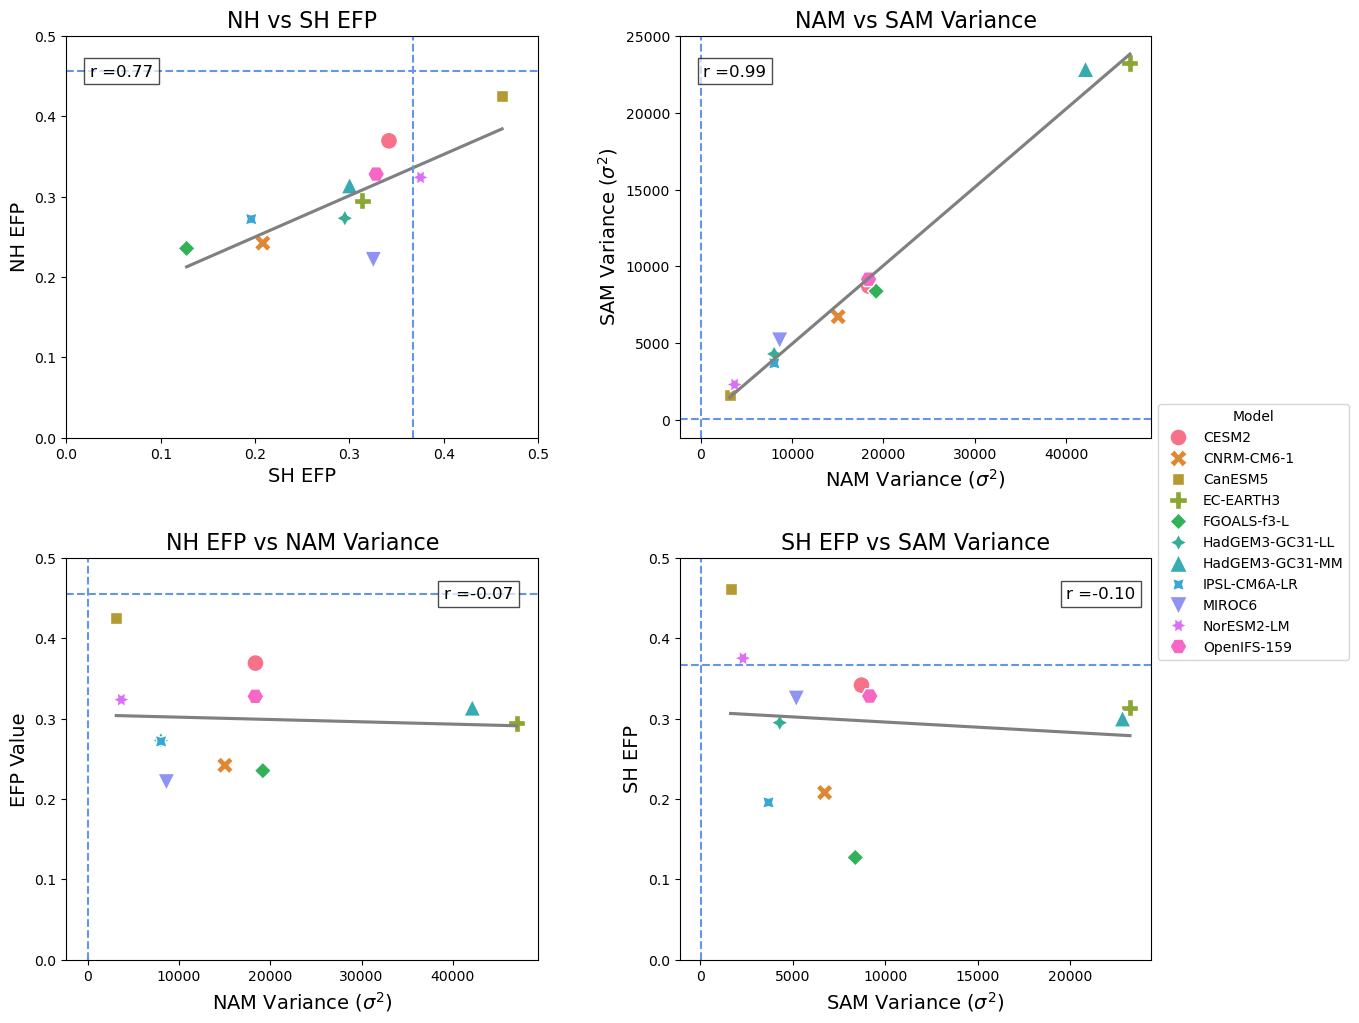

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ax1 (NH vs SH EFP)
sns.regplot(data=df, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,0])
sns.scatterplot(data=df, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, ax=axes[0,0])
r, p = sp.stats.pearsonr(x=df['efp_nh'], y=df['efp_sh'])
axes[0,0].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].axvline(sh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].set_ylabel('NH EFP', fontsize=14)
axes[0,0].set_xlabel('SH EFP', fontsize=14)
axes[0,0].set_title('NH vs SH EFP', fontsize=16)
axes[0,0].set_xlim(0, 0.5)
axes[0,0].set_ylim(0, 0.5)
axes[0,0].get_legend().remove()

# ax2 (NAM vs SAM variance)
sns.regplot(data=df, y='sam_variance', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,1])
sns.scatterplot(data=df, y='sam_variance', x='nam_variance', hue='model', style='model', s=150, ax=axes[0,1])
r, p = sp.stats.pearsonr(x=df['nam_variance'], y=df['sam_variance'])
axes[0,1].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,1].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[0,1].axhline(aao_var, linestyle='--', color='cornflowerblue')
axes[0,1].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_title('NAM vs SAM Variance', fontsize=16)
axes[0,1].get_legend().remove()

# ax3 (NH EFP vs NAM variance)
sns.regplot(data=df_nam, y='efp_nh', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,0])
sns.scatterplot(data=df_nam, y='efp_nh', x='nam_variance', hue='model', style='model', s=150, ax=axes[1,0])
r, p = sp.stats.pearsonr(x=df_nam['nam_variance'], y=df_nam['efp_nh'])
axes[1,0].text(.8, .9, "r ={:.2f}".format(r), transform=axes[1,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,0].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[1,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[1,0].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[1,0].set_ylabel('EFP Value', fontsize=14)
axes[1,0].set_ylim(0, 0.5)
axes[1,0].set_title('NH EFP vs NAM Variance', fontsize=16)
axes[1,0].get_legend().remove()

# ax4 (SH EFP vs SAM variance)
sns.regplot(data=df_sam, y='efp_sh', x='sam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,1])
sns.scatterplot(data=df_sam, y='efp_sh', x='sam_variance', hue='model', style='model', s=150, ax=axes[1,1])
r, p = sp.stats.pearsonr(x=df_sam['sam_variance'], y=df_sam['efp_sh'])
axes[1,1].text(.82, .9, "r ={:.2f}".format(r), transform=axes[1,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,1].axvline(aao_var, linestyle='--', color='cornflowerblue')
axes[1,1].axhline(sh_efp, linestyle='--', color='cornflowerblue')
axes[1,1].set_xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[1,1].set_ylabel('SH EFP', fontsize=14)
axes[1,1].set_ylim(0, 0.5)
axes[1,1].set_title('SH EFP vs SAM Variance', fontsize=16)
axes[1,1].get_legend().remove()

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.legend(bbox_to_anchor=(1,1.4), title='Model')
plt.savefig('./plots/U500_efp_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()


## Remove 2 models

In [9]:
remove_models = ['EC-EARTH3', 'HadGEM3-GC31-MM']

df2 = df[~df['model'].isin(remove_models)].reset_index(drop=True)
df2

,model,nam_variance,efp_nh,sam_variance,efp_sh
0,CESM2,18386.25,0.3693,8719.39,0.3419
1,CNRM-CM6-1,15041.23,0.2421,6727.68,0.2082
2,CanESM5,3145.54,0.4256,1641.94,0.4618
3,FGOALS-f3-L,19197.29,0.2354,8387.31,0.1274
4,HadGEM3-GC31-LL,8030.13,0.2730,4301.28,0.2951
5,IPSL-CM6A-LR,8048.75,0.2719,3692.72,0.1959
6,MIROC6,8634.23,0.2213,5195.94,0.3253
7,NorESM2-LM,3697.83,0.3238,2311.66,0.3754
8,OpenIFS-159,18369.92,0.3279,9165.64,0.3283


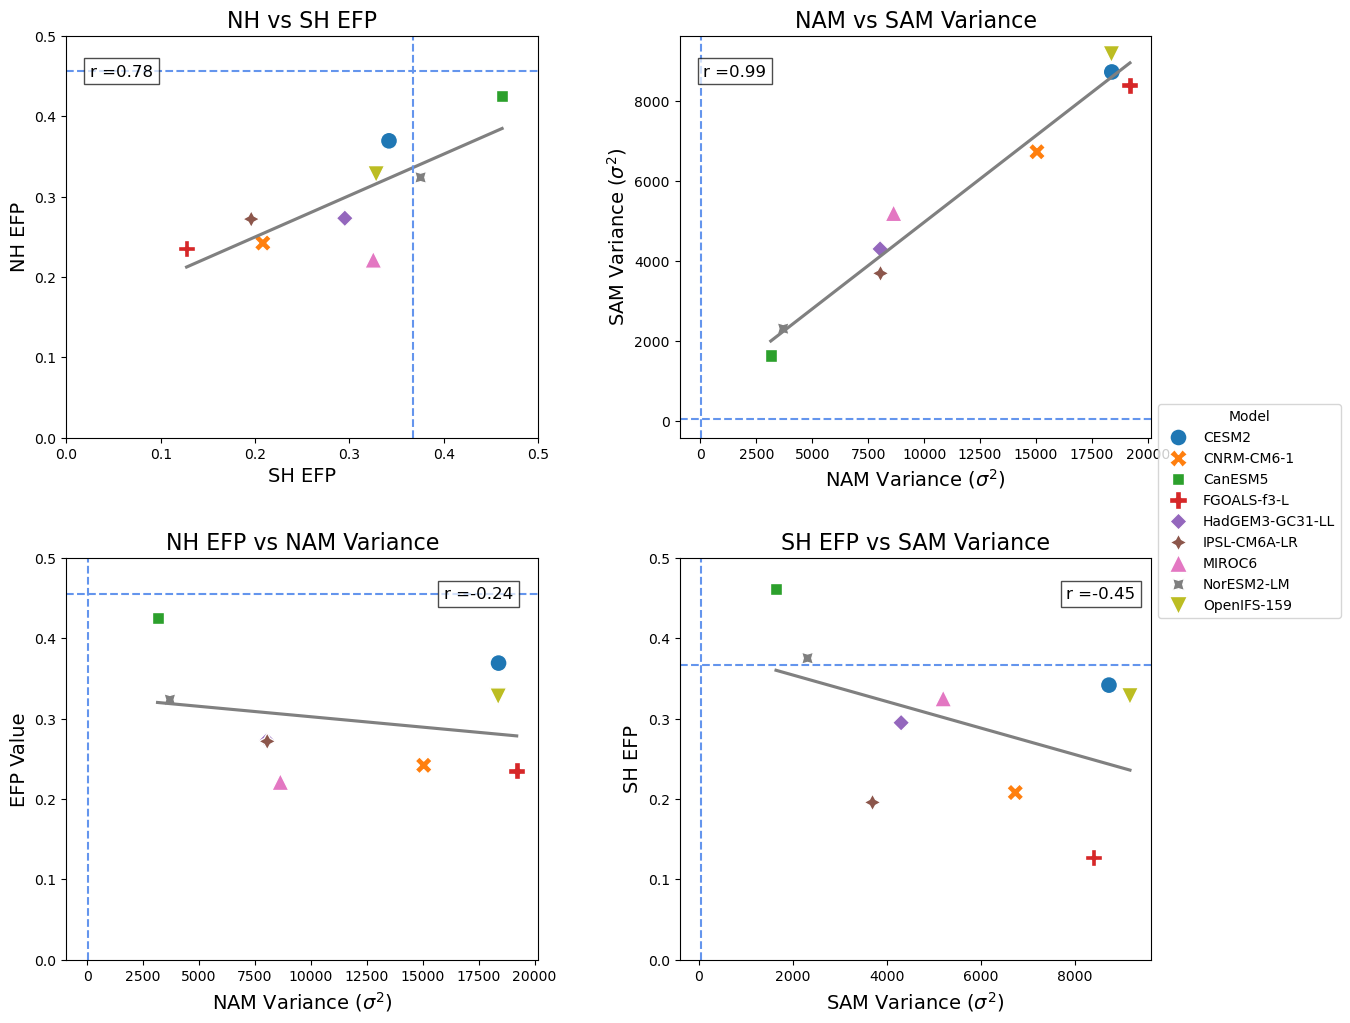

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ax1 (NH vs SH EFP)
sns.regplot(data=df2, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,0])
sns.scatterplot(data=df2, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, ax=axes[0,0])
r, p = sp.stats.pearsonr(x=df2['efp_nh'], y=df2['efp_sh'])
axes[0,0].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].axvline(sh_efp, linestyle='--', color='cornflowerblue')
axes[0,0].set_ylabel('NH EFP', fontsize=14)
axes[0,0].set_xlabel('SH EFP', fontsize=14)
axes[0,0].set_title('NH vs SH EFP', fontsize=16)
axes[0,0].set_xlim(0, 0.5)
axes[0,0].set_ylim(0, 0.5)
axes[0,0].get_legend().remove()

# ax2 (NAM vs SAM variance)
sns.regplot(data=df2, y='sam_variance', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[0,1])
sns.scatterplot(data=df2, y='sam_variance', x='nam_variance', hue='model', style='model', s=150, ax=axes[0,1])
r, p = sp.stats.pearsonr(x=df2['nam_variance'], y=df2['sam_variance'])
axes[0,1].text(.05, .9, "r ={:.2f}".format(r), transform=axes[0,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0,1].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[0,1].axhline(aao_var, linestyle='--', color='cornflowerblue')
axes[0,1].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[0,1].set_title('NAM vs SAM Variance', fontsize=16)
axes[0,1].get_legend().remove()

# ax3 (NH EFP vs NAM variance)
sns.regplot(data=df2, y='efp_nh', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,0])
sns.scatterplot(data=df2, y='efp_nh', x='nam_variance', hue='model', style='model', s=150, ax=axes[1,0])
r, p = sp.stats.pearsonr(x=df2['nam_variance'], y=df2['efp_nh'])
axes[1,0].text(.8, .9, "r ={:.2f}".format(r), transform=axes[1,0].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,0].axvline(ao_var, linestyle='--', color='cornflowerblue')
axes[1,0].axhline(nh_efp, linestyle='--', color='cornflowerblue')
axes[1,0].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[1,0].set_ylabel('EFP Value', fontsize=14)
axes[1,0].set_ylim(0, 0.5)
axes[1,0].set_title('NH EFP vs NAM Variance', fontsize=16)
axes[1,0].get_legend().remove()

# ax4 (SH EFP vs SAM variance)
sns.regplot(data=df2, y='efp_sh', x='sam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None, ax=axes[1,1])
sns.scatterplot(data=df2, y='efp_sh', x='sam_variance', hue='model', style='model', s=150, ax=axes[1,1])
r, p = sp.stats.pearsonr(x=df2['sam_variance'], y=df2['efp_sh'])
axes[1,1].text(.82, .9, "r ={:.2f}".format(r), transform=axes[1,1].transAxes, 
               bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1,1].axvline(aao_var, linestyle='--', color='cornflowerblue')
axes[1,1].axhline(sh_efp, linestyle='--', color='cornflowerblue')
axes[1,1].set_xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[1,1].set_ylabel('SH EFP', fontsize=14)
axes[1,1].set_ylim(0, 0.5)
axes[1,1].set_title('SH EFP vs SAM Variance', fontsize=16)
axes[1,1].get_legend().remove()

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.legend(bbox_to_anchor=(1,1.4), title='Model')
plt.savefig('./plots/U500_efp_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()
